## Import Statements / Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,10/17/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,9/16/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,3/7/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,3/8/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,11/2/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,12/28/2018,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,12/4/2018,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,12/5/2018,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,11/20/2018,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,9/9/2018,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


## Initial Copy / Wrangling Date

In [4]:
df_copy = df.copy()

In [5]:
df_copy['MONTH'] = pd.to_datetime(df_copy['DATE'], format='%m/%d/%Y').dt.month.astype(str)
df_copy['YEAR'] = pd.to_datetime(df_copy['DATE'], format='%m/%d/%Y').dt.year.astype(str)
df_copy['M_Y'] = df_copy['MONTH'] + '-' + df_copy['YEAR']
df_copy['MONTH'] = df_copy['MONTH'].astype(int)
df_copy = df_copy.sort_values(by=['YEAR', 'MONTH'])
df_copy = df_copy.reset_index(drop=True)

In [6]:
df_copy['M_Y'].value_counts()

12-2018    22835
3-2019     22592
7-2018     22562
8-2018     22410
5-2019     22391
10-2018    22288
1-2019     22161
11-2018    21852
6-2019     21829
4-2019     21766
9-2018     21743
2-2019     20405
Name: M_Y, dtype: int64

In [7]:
df_copy.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,M_Y
0,1011,7/29/2018,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,180,GRNWVES,OLDER SINGLES/COUPLES,Mainstream,7,2018,7-2018
1,1027,7/6/2018,1,34,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70,INFUZIONS,OLDER FAMILIES,Premium,7,2018,7-2018
2,1042,7/21/2018,1,45,94,Burger Rings 220g,1,2.3,220,BURGER,YOUNG SINGLES/COUPLES,Premium,7,2018,7-2018
3,1055,7/8/2018,1,62,43,Smith Crinkle Cut Bolognese 150g,1,2.6,150,SMITHS,RETIREES,Mainstream,7,2018,7-2018
4,1057,7/6/2018,1,64,23,Cheezels Cheese 330g,1,5.7,330,CHEEZELS,MIDAGE SINGLES/COUPLES,Mainstream,7,2018,7-2018


In [8]:
df_copy.tail()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,M_Y
264829,2330081,6/22/2019,77,236723,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170,DORITOS,RETIREES,Mainstream,6,2019,6-2019
264830,2330171,6/20/2019,77,236737,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,RETIREES,Mainstream,6,2019,6-2019
264831,2330271,6/29/2019,77,236749,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,6,2019,6-2019
264832,2330291,6/18/2019,77,236754,83,WW D/Style Chip Sea Salt 200g,1,1.9,200,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,6,2019,6-2019
264833,2330501,6/20/2019,77,236780,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135,KETTLE,OLDER SINGLES/COUPLES,Budget,6,2019,6-2019


In [9]:
df_copy['STORE_NBR'].value_counts()

226    2020
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

## Sales Magnitude and Pearson Correlations

In [10]:
df_copy_1 = df_copy[['STORE_NBR', 'M_Y', 'MONTH', 'TOT_SALES']].groupby(by = ['STORE_NBR', 'MONTH', 'M_Y'], as_index=False).sum()
df_copy_1

,STORE_NBR,MONTH,M_Y,TOT_SALES
0,1,1,1-2019,154.80
1,1,2,2-2019,225.40
2,1,3,3-2019,192.90
3,1,4,4-2019,192.90
4,1,5,5-2019,221.40
...,...,...,...,...
3164,272,8,8-2018,372.85
3165,272,9,9-2018,304.70
3166,272,10,10-2018,430.60
3167,272,11,11-2018,376.20


In [11]:
df_copy_1 = df_copy_1.query('MONTH >= 7 or MONTH <= 2')
df_copy_1['MONTH'] = df_copy_1['MONTH'].replace([1,2], [13,14])
df_copy_1 = df_copy_1.sort_values(by=['STORE_NBR', 'MONTH'])
df_copy_1 = df_copy_1.reset_index(drop=True)
df_copy_1

,STORE_NBR,MONTH,M_Y,TOT_SALES
0,1,7,7-2018,206.9
1,1,8,8-2018,176.1
2,1,9,9-2018,278.8
3,1,10,10-2018,188.1
4,1,11,11-2018,192.6
...,...,...,...,...
2107,272,10,10-2018,430.6
2108,272,11,11-2018,376.2
2109,272,12,12-2018,403.9
2110,272,13,1-2019,423.0


In [12]:
df_copy_1.describe()

,STORE_NBR,MONTH,TOT_SALES
count,2112.000000,2112.000000,2112.000000
mean,136.689867,10.495739,610.676349
std,78.454451,2.292860,390.435611
min,1.000000,7.000000,1.800000
25%,68.000000,8.000000,258.550000
50%,137.000000,10.000000,676.750000
75%,204.000000,12.000000,929.525000
max,272.000000,14.000000,1659.600000


In [13]:
store_nums = df_copy_1['STORE_NBR'].drop_duplicates()

In [14]:
sales_corr_77 = []
sales_corr_86 = []
sales_corr_88 = []

def corr_compare(control, trial):
    df_corr_con = df_copy_1[df_copy_1['STORE_NBR'] == control]
    df_corr_tri = df_copy_1[df_copy_1['STORE_NBR'] == trial]
    sales_corr = (stats.pearsonr(df_corr_con['TOT_SALES'], df_corr_tri['TOT_SALES'])[0])
    if trial == 77:
        sales_corr_77.append(sales_corr)
    elif trial == 86:
        sales_corr_86.append(sales_corr)
    else:
        sales_corr_88.append(sales_corr)
        



In [15]:
store_list = []
df_copy_2 = df_copy_1.copy()
for i in store_nums:
    if i == 77 or i == 86 or i == 88:
        continue
    else:
        try:
            corr_compare(i, 77)
            corr_compare(i, 86)
            corr_compare(i, 88)
            store_list.append(i)
        except ValueError:
            df_copy_2 = df_copy_2[df_copy_2['STORE_NBR'] != i]
            
df_copy_2 = df_copy_2.reset_index(drop=True)

In [16]:
df_copy_2['DIFF_77'] = df_copy_2['TOT_SALES']
df_copy_2['DIFF_86'] = df_copy_2['TOT_SALES']
df_copy_2['DIFF_88'] = df_copy_2['TOT_SALES']
df_copy_2.head()

,STORE_NBR,MONTH,M_Y,TOT_SALES,DIFF_77,DIFF_86,DIFF_88
0,1,7,7-2018,206.9,206.9,206.9,206.9
1,1,8,8-2018,176.1,176.1,176.1,176.1
2,1,9,9-2018,278.8,278.8,278.8,278.8
3,1,10,10-2018,188.1,188.1,188.1,188.1
4,1,11,11-2018,192.6,192.6,192.6,192.6


In [17]:
df_copy_2.query('STORE_NBR == 77')

,STORE_NBR,MONTH,M_Y,TOT_SALES,DIFF_77,DIFF_86,DIFF_88
576,77,7,7-2018,296.8,296.8,296.8,296.8
577,77,8,8-2018,255.5,255.5,255.5,255.5
578,77,9,9-2018,225.2,225.2,225.2,225.2
579,77,10,10-2018,204.5,204.5,204.5,204.5
580,77,11,11-2018,245.3,245.3,245.3,245.3
581,77,12,12-2018,267.3,267.3,267.3,267.3
582,77,13,1-2019,204.4,204.4,204.4,204.4
583,77,14,2-2019,235.0,235.0,235.0,235.0


In [18]:
df_copy_2.query('STORE_NBR == 86')

,STORE_NBR,MONTH,M_Y,TOT_SALES,DIFF_77,DIFF_86,DIFF_88
640,86,7,7-2018,892.20,892.20,892.20,892.20
641,86,8,8-2018,764.05,764.05,764.05,764.05
642,86,9,9-2018,914.60,914.60,914.60,914.60
643,86,10,10-2018,948.40,948.40,948.40,948.40
644,86,11,11-2018,918.00,918.00,918.00,918.00
645,86,12,12-2018,841.20,841.20,841.20,841.20
646,86,13,1-2019,841.40,841.40,841.40,841.40
647,86,14,2-2019,913.20,913.20,913.20,913.20


In [19]:
df_copy_2.query('STORE_NBR == 88')

,STORE_NBR,MONTH,M_Y,TOT_SALES,DIFF_77,DIFF_86,DIFF_88
656,88,7,7-2018,1310.0,1310.0,1310.0,1310.0
657,88,8,8-2018,1323.8,1323.8,1323.8,1323.8
658,88,9,9-2018,1423.0,1423.0,1423.0,1423.0
659,88,10,10-2018,1352.4,1352.4,1352.4,1352.4
660,88,11,11-2018,1382.8,1382.8,1382.8,1382.8
661,88,12,12-2018,1325.2,1325.2,1325.2,1325.2
662,88,13,1-2019,1266.4,1266.4,1266.4,1266.4
663,88,14,2-2019,1370.2,1370.2,1370.2,1370.2


In [20]:
for i in range(df_copy_2.shape[0]):
    df_copy_2['DIFF_77'][i] = abs(df_copy_2['TOT_SALES'][i] - df_copy_2['TOT_SALES'][(i%8)+576])
    df_copy_2['DIFF_86'][i] = abs(df_copy_2['TOT_SALES'][i] - df_copy_2['TOT_SALES'][(i%8)+640])
    df_copy_2['DIFF_88'][i] = abs(df_copy_2['TOT_SALES'][i] - df_copy_2['TOT_SALES'][(i%8)+656])

In [21]:
df_copy_2['SALES_MAG_77'] = 1 - (df_copy_2['DIFF_77'] / df_copy_2['DIFF_77'].max())
df_copy_2['SALES_MAG_86'] = 1 - (df_copy_2['DIFF_86'] / df_copy_2['DIFF_86'].max())
df_copy_2['SALES_MAG_88'] = 1 - (df_copy_2['DIFF_88'] / df_copy_2['DIFF_88'].max())

In [22]:
df_copy_2.describe()

,STORE_NBR,MONTH,TOT_SALES,DIFF_77,DIFF_86,DIFF_88,SALES_MAG_77,SALES_MAG_86,SALES_MAG_88
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,136.892308,10.500000,619.759014,432.480649,377.291322,726.935024,0.689377,0.601045,0.484882
std,78.446754,2.291839,386.437545,325.253111,278.284035,385.271690,0.233608,0.294262,0.273010
min,1.000000,7.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.750000,8.750000,269.650000,121.375000,111.250000,405.950000,0.499892,0.347481,0.237635
50%,137.500000,10.500000,700.300000,449.400000,366.000000,649.575000,0.677225,0.612985,0.539700
75%,203.250000,12.250000,931.475000,696.300000,617.087500,1075.850000,0.912824,0.882362,0.712337
max,272.000000,14.000000,1659.600000,1392.300000,945.700000,1411.200000,1.000000,1.000000,1.000000


In [23]:
df_mag = df_copy_2[['STORE_NBR', 'SALES_MAG_77', 'SALES_MAG_86', 'SALES_MAG_88']].groupby(by='STORE_NBR', as_index=False).mean()

In [24]:
df_mag

,STORE_NBR,SALES_MAG_77,SALES_MAG_86,SALES_MAG_88
0,1,0.961494,0.283500,0.190272
1,2,0.940198,0.237978,0.159767
2,3,0.390411,0.776515,0.820193
3,4,0.274905,0.598584,0.872414
4,5,0.593056,0.915096,0.620261
...,...,...,...,...
255,268,0.962252,0.296949,0.199285
256,269,0.489541,0.914898,0.722391
257,270,0.494330,0.864479,0.717665
258,271,0.589052,0.913748,0.624212


## Customer Magnitude and Pearson Correlations

In [25]:
df_copy_3 = df_copy[['STORE_NBR', 'M_Y', 'MONTH', 'LYLTY_CARD_NBR']]
df_copy_3['LYLTY_CARD_NBR'] = df_copy_3['LYLTY_CARD_NBR'].astype(str)
df_copy_3['M_Y + LYLTY_CARD_NBR'] = df_copy_3['M_Y'] + '-' + df_copy_3['LYLTY_CARD_NBR']
df_copy_3 = df_copy_3.drop_duplicates(subset='M_Y + LYLTY_CARD_NBR')
df_copy_3 = df_copy_3.drop('M_Y + LYLTY_CARD_NBR', axis=1)
df_copy_3 = df_copy_3.groupby(by=['STORE_NBR', 'M_Y', 'MONTH'], as_index=False).count()
df_copy_3 = df_copy_3.rename(columns={'LYLTY_CARD_NBR':'CUST_COUNT'})
df_copy_3

,STORE_NBR,M_Y,MONTH,CUST_COUNT
0,1,1-2019,1,35
1,1,10-2018,10,44
2,1,11-2018,11,46
3,1,12-2018,12,42
4,1,2-2019,2,52
...,...,...,...,...
3164,272,5-2019,5,34
3165,272,6-2019,6,34
3166,272,7-2018,7,48
3167,272,8-2018,8,44


In [26]:
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3168
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STORE_NBR   3169 non-null   int64 
 1   M_Y         3169 non-null   object
 2   MONTH       3169 non-null   int64 
 3   CUST_COUNT  3169 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 123.8+ KB


In [27]:
df_copy_3 = df_copy_3.query('MONTH >= 7 or MONTH <= 2')
df_copy_3['MONTH'] = df_copy_3['MONTH'].replace([1,2], [13,14])
df_copy_3 = df_copy_3.sort_values(by=['STORE_NBR', 'MONTH'])
df_copy_3 = df_copy_3.reset_index(drop=True)
df_copy_3

,STORE_NBR,M_Y,MONTH,CUST_COUNT
0,1,7-2018,7,49
1,1,8-2018,8,42
2,1,9-2018,9,59
3,1,10-2018,10,44
4,1,11-2018,11,46
...,...,...,...,...
2107,272,10-2018,10,44
2108,272,11-2018,11,41
2109,272,12-2018,12,47
2110,272,1-2019,13,46


In [28]:
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STORE_NBR   2112 non-null   int64 
 1   M_Y         2112 non-null   object
 2   MONTH       2112 non-null   int64 
 3   CUST_COUNT  2112 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.1+ KB


In [29]:
cust_corr_77 = []
cust_corr_86 = []
cust_corr_88 = []

def cust_corr_compare(control, trial):
    df_corr_con = df_copy_3[df_copy_3['STORE_NBR'] == control]
    df_corr_tri = df_copy_3[df_copy_3['STORE_NBR'] == trial]
    cust_corr = (stats.pearsonr(df_corr_con['CUST_COUNT'], df_corr_tri['CUST_COUNT'])[0])
    if trial == 77:
        cust_corr_77.append(cust_corr)
    elif trial == 86:
        cust_corr_86.append(cust_corr)
    else:
        cust_corr_88.append(cust_corr)

In [30]:

df_copy_4 = df_copy_3.copy()
for i in store_nums:
    if i == 77 or i == 86 or i == 88:
        continue
    else:
        try:
            cust_corr_compare(i, 77)
            cust_corr_compare(i, 86)
            cust_corr_compare(i, 88)

        except ValueError:
            df_copy_4 = df_copy_4[df_copy_4['STORE_NBR'] != i]
            
df_copy_4 = df_copy_4.reset_index(drop=True)
df_copy_4

,STORE_NBR,M_Y,MONTH,CUST_COUNT
0,1,7-2018,7,49
1,1,8-2018,8,42
2,1,9-2018,9,59
3,1,10-2018,10,44
4,1,11-2018,11,46
...,...,...,...,...
2075,272,10-2018,10,44
2076,272,11-2018,11,41
2077,272,12-2018,12,47
2078,272,1-2019,13,46


In [31]:
df_copy_4['DIFF_77'] = df_copy_4['CUST_COUNT']
df_copy_4['DIFF_86'] = df_copy_4['CUST_COUNT']
df_copy_4['DIFF_88'] = df_copy_4['CUST_COUNT']
df_copy_4.head()

,STORE_NBR,M_Y,MONTH,CUST_COUNT,DIFF_77,DIFF_86,DIFF_88
0,1,7-2018,7,49,49,49,49
1,1,8-2018,8,42,42,42,42
2,1,9-2018,9,59,59,59,59
3,1,10-2018,10,44,44,44,44
4,1,11-2018,11,46,46,46,46


In [32]:
df_copy_4.query('STORE_NBR == 77')

,STORE_NBR,M_Y,MONTH,CUST_COUNT,DIFF_77,DIFF_86,DIFF_88
576,77,7-2018,7,51,51,51,51
577,77,8-2018,8,47,47,47,47
578,77,9-2018,9,42,42,42,42
579,77,10-2018,10,37,37,37,37
580,77,11-2018,11,41,41,41,41
581,77,12-2018,12,46,46,46,46
582,77,1-2019,13,35,35,35,35
583,77,2-2019,14,45,45,45,45


In [33]:
df_copy_4.query('STORE_NBR == 86')

,STORE_NBR,M_Y,MONTH,CUST_COUNT,DIFF_77,DIFF_86,DIFF_88
640,86,7-2018,7,99,99,99,99
641,86,8-2018,8,94,94,94,94
642,86,9-2018,9,103,103,103,103
643,86,10-2018,10,109,109,109,109
644,86,11-2018,11,100,100,100,100
645,86,12-2018,12,98,98,98,98
646,86,1-2019,13,94,94,94,94
647,86,2-2019,14,107,107,107,107


In [34]:
df_copy_4.query('STORE_NBR == 88')

,STORE_NBR,M_Y,MONTH,CUST_COUNT,DIFF_77,DIFF_86,DIFF_88
656,88,7-2018,7,129,129,129,129
657,88,8-2018,8,131,131,131,131
658,88,9-2018,9,124,124,124,124
659,88,10-2018,10,123,123,123,123
660,88,11-2018,11,130,130,130,130
661,88,12-2018,12,126,126,126,126
662,88,1-2019,13,117,117,117,117
663,88,2-2019,14,124,124,124,124


In [35]:
for i in range(df_copy_4.shape[0]):
    df_copy_4['DIFF_77'][i] = abs(df_copy_4['CUST_COUNT'][i] - df_copy_4['CUST_COUNT'][(i%8)+576])
    df_copy_4['DIFF_86'][i] = abs(df_copy_4['CUST_COUNT'][i] - df_copy_4['CUST_COUNT'][(i%8)+640])
    df_copy_4['DIFF_88'][i] = abs(df_copy_4['CUST_COUNT'][i] - df_copy_4['CUST_COUNT'][(i%8)+656])

In [36]:
df_copy_4['CUST_MAG_77'] = 1 - (df_copy_4['DIFF_77'] / df_copy_4['DIFF_77'].max())
df_copy_4['CUST_MAG_86'] = 1 - (df_copy_4['DIFF_86'] / df_copy_4['DIFF_86'].max())
df_copy_4['CUST_MAG_88'] = 1 - (df_copy_4['DIFF_88'] / df_copy_4['DIFF_88'].max())

In [37]:
df_copy_4.describe()

,STORE_NBR,MONTH,CUST_COUNT,DIFF_77,DIFF_86,DIFF_88,CUST_MAG_77,CUST_MAG_86,CUST_MAG_88
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,136.892308,10.500000,70.779327,37.216827,36.638942,54.946635,0.642146,0.660751,0.574057
std,78.446754,2.291839,36.208788,26.819594,29.822127,36.065151,0.257881,0.276131,0.279575
min,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.750000,8.750000,41.000000,8.000000,9.000000,23.000000,0.423077,0.444444,0.348837
50%,137.500000,10.500000,82.500000,42.000000,28.500000,45.000000,0.596154,0.736111,0.651163
75%,203.250000,12.250000,103.000000,60.000000,60.000000,84.000000,0.923077,0.916667,0.821705
max,272.000000,14.000000,150.000000,104.000000,108.000000,129.000000,1.000000,1.000000,1.000000


In [38]:
df_mag_1 = df_copy_4[['STORE_NBR', 'CUST_MAG_77', 'CUST_MAG_86', 'CUST_MAG_88']].groupby(by='STORE_NBR', as_index=False).mean()
df_mag_1

,STORE_NBR,CUST_MAG_77,CUST_MAG_86,CUST_MAG_88
0,1,0.943510,0.496528,0.384690
1,2,0.919471,0.417824,0.318798
2,3,0.379808,0.921296,0.860465
3,4,0.283654,0.805556,0.905039
4,5,0.526442,0.916667,0.742248
...,...,...,...,...
255,268,0.939904,0.462963,0.356589
256,269,0.393029,0.931713,0.849806
257,270,0.418269,0.900463,0.829457
258,271,0.526442,0.923611,0.742248


In [39]:
df_mag = df_mag.merge(df_mag_1, on='STORE_NBR')

In [40]:
df_mag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STORE_NBR     260 non-null    int64  
 1   SALES_MAG_77  260 non-null    float64
 2   SALES_MAG_86  260 non-null    float64
 3   SALES_MAG_88  260 non-null    float64
 4   CUST_MAG_77   260 non-null    float64
 5   CUST_MAG_86   260 non-null    float64
 6   CUST_MAG_88   260 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.2 KB


## Creating Comparison Data Frame / Finding Control Stores

In [41]:
d = {'STORE_NBR':store_list, 'SALES_CORR_77':sales_corr_77, 'SALES_CORR_86':sales_corr_86, 'SALES_CORR_88':sales_corr_88,
     'CUST_CORR_77':cust_corr_77, 'CUST_CORR_86':cust_corr_86, 'CUST_CORR_88':cust_corr_88}
df_corr = pd.DataFrame(data=d)
df_corr.head()

,STORE_NBR,SALES_CORR_77,SALES_CORR_86,SALES_CORR_88,CUST_CORR_77,CUST_CORR_86,CUST_CORR_88
0,1,0.050163,0.478355,0.823306,0.350572,0.559062,0.242805
1,2,-0.200796,-0.453556,-0.151853,-0.455226,-0.428881,-0.156135
2,3,0.616574,-0.081104,-0.288716,0.756913,0.026475,0.341899
3,4,-0.094125,-0.204603,-0.619880,-0.302046,-0.462982,-0.122544
4,5,-0.045765,0.067263,0.038594,0.277619,-0.391022,0.028866


In [42]:
df_corr.describe()

,STORE_NBR,SALES_CORR_77,SALES_CORR_86,SALES_CORR_88,CUST_CORR_77,CUST_CORR_86,CUST_CORR_88
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,137.513619,0.054833,-0.029873,-0.091776,0.031999,-0.150912,0.064728
std,78.823780,0.336567,0.385558,0.356382,0.349286,0.357292,0.349681
min,1.000000,-0.674915,-0.876296,-0.825262,-0.700131,-0.877478,-0.827778
25%,68.000000,-0.187933,-0.347284,-0.327081,-0.211958,-0.412005,-0.189143
50%,139.000000,0.050163,-0.032578,-0.112723,0.004218,-0.184714,0.051040
75%,204.000000,0.323690,0.224196,0.136432,0.277619,0.086323,0.296430
max,272.000000,0.894375,0.841589,0.895637,0.990542,0.772289,0.942232


In [43]:
df_control = df_corr.merge(df_mag, on='STORE_NBR')

In [44]:
df_control.tail()

,STORE_NBR,SALES_CORR_77,SALES_CORR_86,SALES_CORR_88,CUST_CORR_77,CUST_CORR_86,CUST_CORR_88,SALES_MAG_77,SALES_MAG_86,SALES_MAG_88,CUST_MAG_77,CUST_MAG_86,CUST_MAG_88
252,268,0.350807,-0.494257,-0.100489,0.283287,-0.203460,0.668599,0.962252,0.296949,0.199285,0.939904,0.462963,0.356589
253,269,-0.315842,0.681775,-0.165132,-0.492708,-0.236966,-0.214158,0.489541,0.914898,0.722391,0.393029,0.931713,0.849806
254,270,0.324937,-0.747037,-0.737748,-0.176932,-0.803394,-0.045451,0.494330,0.864479,0.717665,0.418269,0.900463,0.829457
255,271,0.362891,0.409585,-0.166019,-0.056788,-0.024829,0.048096,0.589052,0.913748,0.624212,0.526442,0.923611,0.742248
256,272,0.114645,0.011432,-0.747878,0.238448,-0.247201,0.009256,0.891739,0.485408,0.325578,0.957933,0.471065,0.363372


In [45]:
df_control['SALES_SCORE_77'] = (0.5*df_control['SALES_CORR_77'] + 0.5*df_control['SALES_MAG_77'])
df_control['SALES_SCORE_86'] = (0.5*df_control['SALES_CORR_86'] + 0.5*df_control['SALES_MAG_86'])
df_control['SALES_SCORE_88'] = (0.5*df_control['SALES_CORR_88'] + 0.5*df_control['SALES_MAG_88'])
df_control['CUST_SCORE_77'] = (0.5*df_control['CUST_CORR_77'] + 0.5*df_control['CUST_MAG_77'])
df_control['CUST_SCORE_86'] = (0.5*df_control['CUST_CORR_86'] + 0.5*df_control['CUST_MAG_86'])
df_control['CUST_SCORE_88'] = (0.5*df_control['CUST_CORR_88'] + 0.5*df_control['CUST_MAG_88'])
df_control.head()

,STORE_NBR,SALES_CORR_77,SALES_CORR_86,SALES_CORR_88,CUST_CORR_77,CUST_CORR_86,CUST_CORR_88,SALES_MAG_77,SALES_MAG_86,SALES_MAG_88,CUST_MAG_77,CUST_MAG_86,CUST_MAG_88,SALES_SCORE_77,SALES_SCORE_86,SALES_SCORE_88,CUST_SCORE_77,CUST_SCORE_86,CUST_SCORE_88
0,1,0.050163,0.478355,0.823306,0.350572,0.559062,0.242805,0.961494,0.283500,0.190272,0.943510,0.496528,0.384690,0.505828,0.380927,0.506789,0.647041,0.527795,0.313748
1,2,-0.200796,-0.453556,-0.151853,-0.455226,-0.428881,-0.156135,0.940198,0.237978,0.159767,0.919471,0.417824,0.318798,0.369701,-0.107789,0.003957,0.232122,-0.005528,0.081332
2,3,0.616574,-0.081104,-0.288716,0.756913,0.026475,0.341899,0.390411,0.776515,0.820193,0.379808,0.921296,0.860465,0.503492,0.347706,0.265738,0.568360,0.473886,0.601182
3,4,-0.094125,-0.204603,-0.619880,-0.302046,-0.462982,-0.122544,0.274905,0.598584,0.872414,0.283654,0.805556,0.905039,0.090390,0.196991,0.126267,-0.009196,0.171287,0.391247
4,5,-0.045765,0.067263,0.038594,0.277619,-0.391022,0.028866,0.593056,0.915096,0.620261,0.526442,0.916667,0.742248,0.273645,0.491180,0.329428,0.402031,0.262822,0.385557


In [46]:
df_control['TOTAL_SCORE_77'] = (0.5*df_control['SALES_SCORE_77'] + 0.5*df_control['CUST_SCORE_77'])
df_control['TOTAL_SCORE_86'] = (0.5*df_control['SALES_SCORE_86'] + 0.5*df_control['CUST_SCORE_86'])
df_control['TOTAL_SCORE_88'] = (0.5*df_control['SALES_SCORE_88'] + 0.5*df_control['CUST_SCORE_88'])
df_control.head()

,STORE_NBR,SALES_CORR_77,SALES_CORR_86,SALES_CORR_88,CUST_CORR_77,CUST_CORR_86,CUST_CORR_88,SALES_MAG_77,SALES_MAG_86,SALES_MAG_88,...,CUST_MAG_88,SALES_SCORE_77,SALES_SCORE_86,SALES_SCORE_88,CUST_SCORE_77,CUST_SCORE_86,CUST_SCORE_88,TOTAL_SCORE_77,TOTAL_SCORE_86,TOTAL_SCORE_88
0,1,0.050163,0.478355,0.823306,0.350572,0.559062,0.242805,0.961494,0.283500,0.190272,...,0.384690,0.505828,0.380927,0.506789,0.647041,0.527795,0.313748,0.576435,0.454361,0.410269
1,2,-0.200796,-0.453556,-0.151853,-0.455226,-0.428881,-0.156135,0.940198,0.237978,0.159767,...,0.318798,0.369701,-0.107789,0.003957,0.232122,-0.005528,0.081332,0.300912,-0.056659,0.042644
2,3,0.616574,-0.081104,-0.288716,0.756913,0.026475,0.341899,0.390411,0.776515,0.820193,...,0.860465,0.503492,0.347706,0.265738,0.568360,0.473886,0.601182,0.535926,0.410796,0.433460
3,4,-0.094125,-0.204603,-0.619880,-0.302046,-0.462982,-0.122544,0.274905,0.598584,0.872414,...,0.905039,0.090390,0.196991,0.126267,-0.009196,0.171287,0.391247,0.040597,0.184139,0.258757
4,5,-0.045765,0.067263,0.038594,0.277619,-0.391022,0.028866,0.593056,0.915096,0.620261,...,0.742248,0.273645,0.491180,0.329428,0.402031,0.262822,0.385557,0.337838,0.377001,0.357492


In [47]:
df_result = df_control[['STORE_NBR','TOTAL_SCORE_77', 'TOTAL_SCORE_86', 'TOTAL_SCORE_88']]
df_result

,STORE_NBR,TOTAL_SCORE_77,TOTAL_SCORE_86,TOTAL_SCORE_88
0,1,0.576435,0.454361,0.410269
1,2,0.300912,-0.056659,0.042644
2,3,0.535926,0.410796,0.433460
3,4,0.040597,0.184139,0.258757
4,5,0.337838,0.377001,0.357492
...,...,...,...,...
252,268,0.634063,0.015549,0.280996
253,269,0.018505,0.572855,0.298227
254,270,0.265151,0.053628,0.190981
255,271,0.355399,0.555529,0.312134


In [48]:
df_result.describe()

,STORE_NBR,TOTAL_SCORE_77,TOTAL_SCORE_86,TOTAL_SCORE_88
count,257.000000,257.000000,257.000000,257.000000
mean,137.513619,0.355163,0.269976,0.257118
std,78.823780,0.198052,0.227057,0.186415
min,1.000000,-0.100813,-0.304428,-0.162293
25%,68.000000,0.223326,0.101460,0.125600
50%,139.000000,0.337444,0.265018,0.250181
75%,204.000000,0.471012,0.427682,0.404595
max,272.000000,0.966567,0.857325,0.810943


In [49]:
control_store_1 = df_result[df_result['TOTAL_SCORE_77'] == df_result['TOTAL_SCORE_77'].max()]
control_store_1.drop(['TOTAL_SCORE_86', 'TOTAL_SCORE_88'], axis = 1, inplace = True)
control_store_1

,STORE_NBR,TOTAL_SCORE_77
218,233,0.966567


In [50]:
control_store_2 = df_result[df_result['TOTAL_SCORE_86'] == df_result['TOTAL_SCORE_86'].max()]
control_store_2.drop(['TOTAL_SCORE_77', 'TOTAL_SCORE_88'], axis = 1, inplace = True)
control_store_2

,STORE_NBR,TOTAL_SCORE_86
144,155,0.857325


In [51]:
control_store_3 = df_result[df_result['TOTAL_SCORE_88'] == df_result['TOTAL_SCORE_88'].max()]
control_store_3.drop(['TOTAL_SCORE_77', 'TOTAL_SCORE_86'], axis = 1, inplace = True)
control_store_3

,STORE_NBR,TOTAL_SCORE_88
222,237,0.810943


In [52]:
def sales_graph(control, trial):
    query_string = 'STORE_NBR == ' + str(control) + ' or STORE_NBR == ' + str(trial)
    df_graph = df_copy_1.query(query_string)
    g = sns.lineplot(data = df_graph, x='M_Y', y='TOT_SALES', hue='STORE_NBR')
    title = 'Total sales for stores ' + str(control) + ' and ' + str(trial) + ' during pre-trial period'
    g.set_title(title, weight = 'bold');

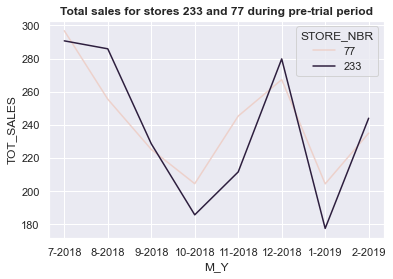

In [53]:
sales_graph(233, 77)

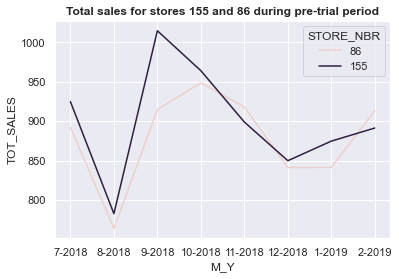

In [54]:
sales_graph(155, 86)

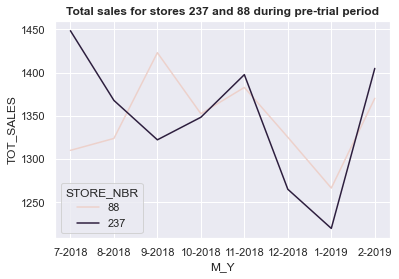

In [55]:
sales_graph(237, 88)

In [56]:
def cust_graph(control, trial):
    query_string = 'STORE_NBR == ' + str(control) + ' or STORE_NBR == ' + str(trial)
    df_graph = df_copy_3.query(query_string)
    g = sns.lineplot(data = df_graph, x='M_Y', y='CUST_COUNT', hue='STORE_NBR', palette = 'Dark2')
    title = 'Unique customer count for stores ' + str(control) + ' and ' + str(trial) + ' during pre-trial period'
    g.set_title(title, weight = 'bold');

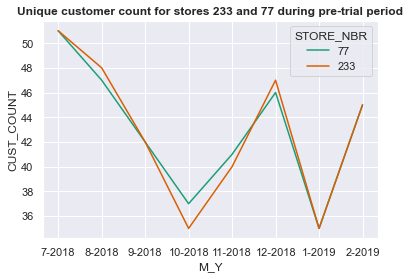

In [57]:
cust_graph(233, 77)

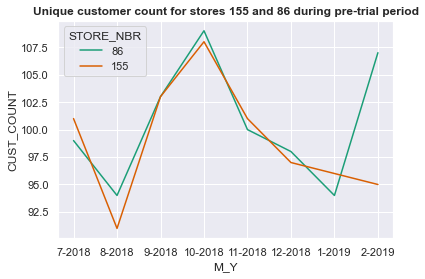

In [58]:
cust_graph(155, 86)

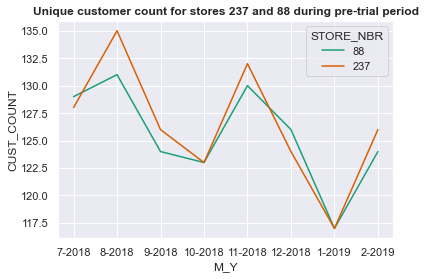

In [59]:
cust_graph(237, 88)

### The control stores for stores 77, 86, and 88 are 233, 155, and 237, respectively.

## Comparing Trial Stores to Control Stores

In [60]:
query_trial_string = 'STORE_NBR == 77 or STORE_NBR == 86 or STORE_NBR == 88 or '
query_control_string = 'STORE_NBR == 155 or STORE_NBR == 233 or STORE_NBR == 237'
query_string = query_trial_string + query_control_string
df_compare = df_copy.query(query_string)
df_compare.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,M_Y
6316,77004,7/18/2018,77,74918,30,Doritos Corn Chips Cheese Supreme 170g,1,4.4,170,DORITOS,RETIREES,Budget,7,2018,7-2018
6317,77004,7/26/2018,77,74919,46,Kettle Original 175g,2,10.8,175,KETTLE,RETIREES,Budget,7,2018,7-2018
6318,77015,7/7/2018,77,74931,85,RRD Honey Soy Chicken 165g,2,6.0,165,RRD,YOUNG FAMILIES,Premium,7,2018,7-2018
6319,77018,7/18/2018,77,74933,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Budget,7,2018,7-2018
6320,77049,7/14/2018,77,74964,93,Doritos Corn Chip Southern Chicken 150g,1,3.9,150,DORITOS,YOUNG SINGLES/COUPLES,Mainstream,7,2018,7-2018


In [61]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 6316 to 264833
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LYLTY_CARD_NBR    7829 non-null   int64  
 1   DATE              7829 non-null   object 
 2   STORE_NBR         7829 non-null   int64  
 3   TXN_ID            7829 non-null   int64  
 4   PROD_NBR          7829 non-null   int64  
 5   PROD_NAME         7829 non-null   object 
 6   PROD_QTY          7829 non-null   int64  
 7   TOT_SALES         7829 non-null   float64
 8   PACK_SIZE         7829 non-null   int64  
 9   BRAND             7829 non-null   object 
 10  LIFESTAGE         7829 non-null   object 
 11  PREMIUM_CUSTOMER  7829 non-null   object 
 12  MONTH             7829 non-null   int32  
 13  YEAR              7829 non-null   object 
 14  M_Y               7829 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(7)
memory usage: 948.0+ KB


In [62]:
df_compare['STORE_NBR'].value_counts()

88     1873
237    1785
86     1538
155    1535
77      563
233     535
Name: STORE_NBR, dtype: int64

In [63]:
df_compare = df_compare[['STORE_NBR', 'TOT_SALES', 'MONTH', 'M_Y', 'LYLTY_CARD_NBR']]
df_compare.head()

,STORE_NBR,TOT_SALES,MONTH,M_Y,LYLTY_CARD_NBR
6316,77,4.4,7,7-2018,77004
6317,77,10.8,7,7-2018,77004
6318,77,6.0,7,7-2018,77015
6319,77,4.4,7,7-2018,77018
6320,77,3.9,7,7-2018,77049


In [64]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 6316 to 264833
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STORE_NBR       7829 non-null   int64  
 1   TOT_SALES       7829 non-null   float64
 2   MONTH           7829 non-null   int32  
 3   M_Y             7829 non-null   object 
 4   LYLTY_CARD_NBR  7829 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 336.4+ KB


In [65]:
df_compare['LYLTY_CARD_NBR'] = df_compare['LYLTY_CARD_NBR'].astype(str)
df_compare['M_Y+LYLTY_CARD_NBR'] = df_compare['LYLTY_CARD_NBR'] + '-' + df_compare['M_Y']
df_compare.head()

,STORE_NBR,TOT_SALES,MONTH,M_Y,LYLTY_CARD_NBR,M_Y+LYLTY_CARD_NBR
6316,77,4.4,7,7-2018,77004,77004-7-2018
6317,77,10.8,7,7-2018,77004,77004-7-2018
6318,77,6.0,7,7-2018,77015,77015-7-2018
6319,77,4.4,7,7-2018,77018,77018-7-2018
6320,77,3.9,7,7-2018,77049,77049-7-2018


In [66]:
df_cust_compare = df_compare.drop_duplicates(subset='M_Y+LYLTY_CARD_NBR')
df_cust_compare.drop(['M_Y+LYLTY_CARD_NBR', 'TOT_SALES'], axis=1, inplace=True)
df_cust_compare = df_cust_compare.groupby(['STORE_NBR', 'M_Y', 'MONTH'], as_index=False).count()
df_cust_compare = df_cust_compare.rename(columns={'LYLTY_CARD_NBR':'CUST_COUNT'})
df_cust_compare['MONTH'] = df_cust_compare['MONTH'].replace([1,2,3,4,5,6],[13,14,15,16,17,18])
df_cust_compare.sort_values(by=['STORE_NBR','MONTH'], inplace=True)
df_cust_compare = df_cust_compare.reset_index(drop=True)
df_cust_compare.head(13)

,STORE_NBR,M_Y,MONTH,CUST_COUNT
0,77,7-2018,7,51
1,77,8-2018,8,47
2,77,9-2018,9,42
3,77,10-2018,10,37
4,77,11-2018,11,41
5,77,12-2018,12,46
6,77,1-2019,13,35
7,77,2-2019,14,45
8,77,3-2019,15,50
9,77,4-2019,16,47


In [67]:
df_cust_compare['CUST_DIFF'] = 0
df_cust_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STORE_NBR   72 non-null     int64 
 1   M_Y         72 non-null     object
 2   MONTH       72 non-null     int64 
 3   CUST_COUNT  72 non-null     int64 
 4   CUST_DIFF   72 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


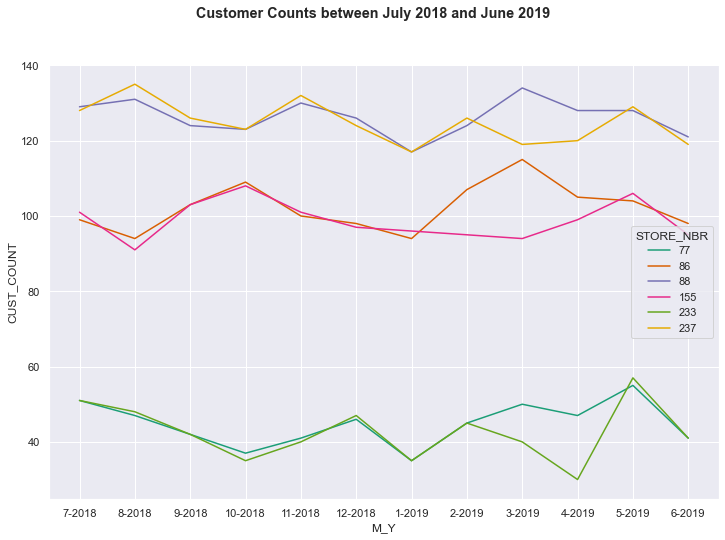

In [68]:
fig = plt.figure(figsize=[12,8])
fig.suptitle('Customer Counts between July 2018 and June 2019', weight='bold')
sns.lineplot(data=df_cust_compare, x='M_Y', y='CUST_COUNT', hue='STORE_NBR', palette='Dark2');

In [81]:
df_cust_compare.to_csv('ExcelData2_1.csv', index=False)

In [69]:
def cust_t_test (trial, control):
    query_control = 'STORE_NBR == ' + str(control)
    query_trial = 'STORE_NBR == ' + str(trial)
    query_string = query_control + 'or ' + query_trial
    df = df_cust_compare.query(query_string)
    df = df.reset_index(drop=True)
    for i in range(df.shape[0]):
        if df['STORE_NBR'][i] == control:
            df['CUST_DIFF'][i] = abs(df['CUST_COUNT'][i] - df['CUST_COUNT'][i+12])
    df_control = df.query('MONTH < 14 and ' + query_control)
    df_trial = df.query('MONTH >= 14 and MONTH < 17 and ' + query_control)
    print(stats.ttest_ind(df_control['CUST_DIFF'], df_trial['CUST_DIFF']))
    #print('April: ' , stats.ttest_ind(df_control_apr['TOT_SALES'], df_trial_apr['TOT_SALES']))
    #print('May: ' , stats.ttest_ind(df_control_may['TOT_SALES'], df_trial_may['TOT_SALES']))
    

In [70]:
cust_t_test(233, 77)

Ttest_indResult(statistic=-2.7782272846411047, pvalue=0.023990097088668012)


In [71]:
cust_t_test(155, 86)

Ttest_indResult(statistic=-4.3347956653826865, pvalue=0.0024958096834224014)


In [72]:
cust_t_test(237, 88)

Ttest_indResult(statistic=-2.8231118423307824, pvalue=0.02238634917382899)


In [73]:
df_compare.head()

,STORE_NBR,TOT_SALES,MONTH,M_Y,LYLTY_CARD_NBR,M_Y+LYLTY_CARD_NBR
6316,77,4.4,7,7-2018,77004,77004-7-2018
6317,77,10.8,7,7-2018,77004,77004-7-2018
6318,77,6.0,7,7-2018,77015,77015-7-2018
6319,77,4.4,7,7-2018,77018,77018-7-2018
6320,77,3.9,7,7-2018,77049,77049-7-2018


In [74]:
df_sales_compare = df_compare[['STORE_NBR', 'TOT_SALES', 'MONTH', 'M_Y']]
df_sales_compare = df_sales_compare.groupby(by=['STORE_NBR', 'MONTH', 'M_Y'], as_index=False).sum()
df_sales_compare['MONTH'] = df_sales_compare['MONTH'].replace([1,2,3,4,5,6],[13,14,15,16,17,18])
df_sales_compare.sort_values(by=['STORE_NBR', 'MONTH'], inplace=True)
df_sales_compare.reset_index(drop=True, inplace=True)
df_sales_compare.head(13)

,STORE_NBR,MONTH,M_Y,TOT_SALES
0,77,7,7-2018,296.8
1,77,8,8-2018,255.5
2,77,9,9-2018,225.2
3,77,10,10-2018,204.5
4,77,11,11-2018,245.3
5,77,12,12-2018,267.3
6,77,13,1-2019,204.4
7,77,14,2-2019,235.0
8,77,15,3-2019,278.5
9,77,16,4-2019,263.5


In [75]:
df_sales_compare['SALES_DIFF'] = 0
df_sales_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STORE_NBR   72 non-null     int64  
 1   MONTH       72 non-null     int64  
 2   M_Y         72 non-null     object 
 3   TOT_SALES   72 non-null     float64
 4   SALES_DIFF  72 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.9+ KB


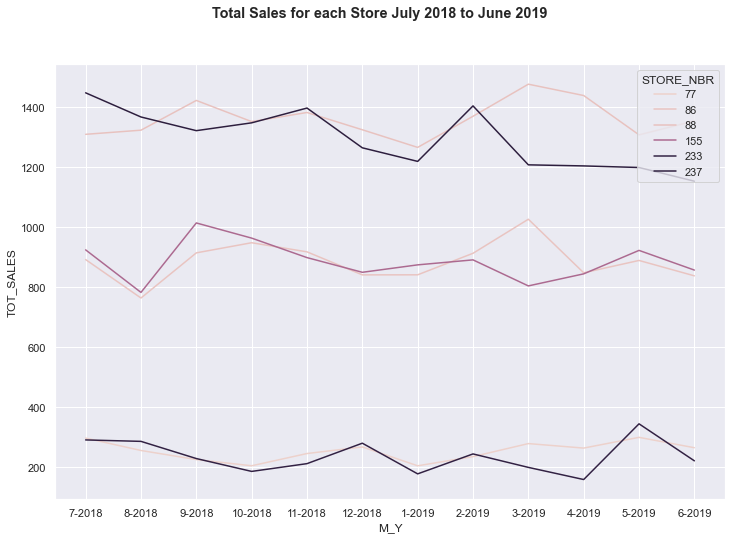

In [76]:
fig = plt.figure(figsize=[12,8])
fig.suptitle('Total Sales for each Store July 2018 to June 2019', weight='bold')
sns.lineplot(data=df_sales_compare, x='M_Y', y='TOT_SALES', hue='STORE_NBR', color='Dark2');

In [82]:
df_sales_compare.to_csv('ExcelData2_2.csv', index=False)

In [77]:
def sales_t_test (trial, control):
    query_control = 'STORE_NBR == ' + str(control)
    query_trial = 'STORE_NBR == ' + str(trial)
    query_string = query_control + 'or ' + query_trial
    df = df_sales_compare.query(query_string)
    df = df.reset_index(drop=True)
    for i in range(df.shape[0]):
        if df['STORE_NBR'][i] == control:
            df['SALES_DIFF'][i] = abs(df['TOT_SALES'][i] - df['TOT_SALES'][i+12])
    df_control = df.query('MONTH < 14 and ' + query_control)
    df_trial = df.query('MONTH >= 14 and MONTH < 17 and ' + query_control)
    print(stats.ttest_ind(df_control['SALES_DIFF'], df_trial['SALES_DIFF']))
    #print('April: ' , stats.ttest_ind(df_control_apr['TOT_SALES'], df_trial_apr['TOT_SALES']))
    #print('May: ' , stats.ttest_ind(df_control_may['TOT_SALES'], df_trial_may['TOT_SALES']))

In [78]:
sales_t_test(233, 77)

Ttest_indResult(statistic=-2.4845549222870376, pvalue=0.03784202458851265)


In [79]:
sales_t_test(155, 86)

Ttest_indResult(statistic=-1.1002256939442643, pvalue=0.30323515424681996)


In [80]:
sales_t_test(237, 88)

Ttest_indResult(statistic=-2.3249925736853405, pvalue=0.04853964305544441)


### Sales in trial period are statistically significant for stores 77 and 88 with p-values < 0.05.  Sales are not statistically significant for store 86 for trial period (p-value = 0.3).  However, number of unique customers in trial period is statistically significant for all stores in comparison to pre-trial period.